In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas.io.data import DataReader

In [3]:
from datetime import datetime

In [4]:
from __future__ import division

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()

In [7]:
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [9]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-06-12,531.599976,533.119995,530.159973,532.330017,955800,532.330017
2015-06-15,528.000000,528.299988,524.000000,527.200012,1632700,527.200012
2015-06-16,528.400024,529.640015,525.559998,528.150024,1071800,528.150024
2015-06-17,529.369995,530.979980,525.099976,529.260010,1294200,529.260010
2015-06-18,531.000000,538.150024,530.789978,536.729980,1833100,536.729980


In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,109.468135,110.539682,108.296706,109.433095,4.761688e+07,108.149654
std,10.408024,10.327981,10.412056,10.341933,2.112765e+07,9.696672
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,99.392502,100.759999,98.600000,99.935000,3.323538e+07,99.602606
50%,110.230003,111.640000,108.930000,110.180001,4.339970e+07,108.775893
75%,116.557503,117.692501,115.500000,116.312500,5.538038e+07,114.799329
max,132.850006,132.970001,130.699997,132.070007,1.622063e+08,129.419998


In [11]:
AAPL.shape

(252, 6)

In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-06-12 to 2016-06-10
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


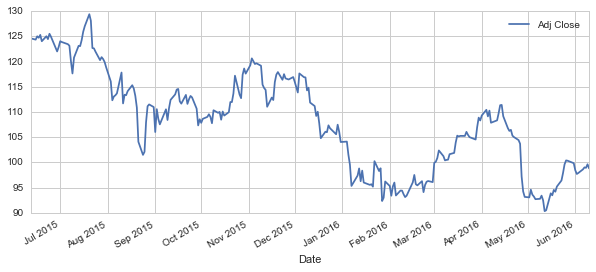

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

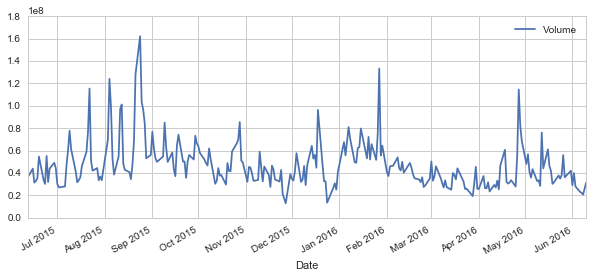

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [30]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    # AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [34]:
AAPL.tail()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2016-06-06,97.989998,101.889999,97.550003,98.629997,23242200,98.629997,98.730,95.911499,100.845035
2016-06-07,99.250000,99.870003,98.959999,99.029999,22366400,99.029999,98.990,96.223499,100.734567
2016-06-08,99.019997,99.559998,98.680000,98.940002,20812700,98.940002,99.094,96.499500,100.572799
2016-06-09,98.500000,99.989998,98.459999,99.650002,26419600,99.650002,99.097,96.856500,100.387860
2016-06-10,98.529999,99.349998,98.480003,98.830002,31462100,98.830002,98.939,97.281000,100.197851


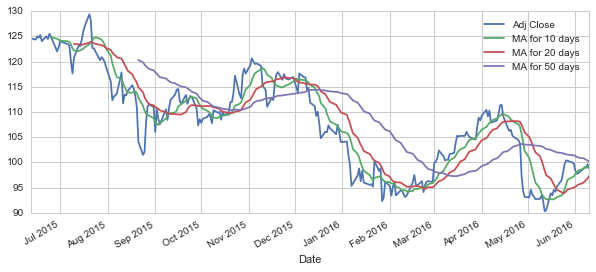

In [32]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(legend=True,subplots=False,figsize=(10,4))

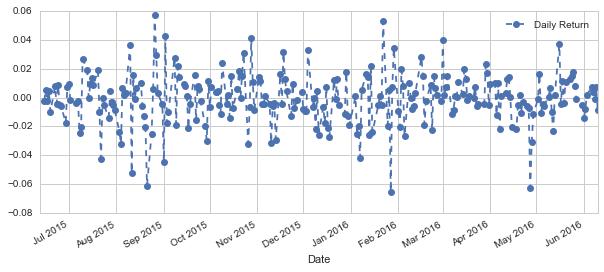

In [39]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

In [40]:
AAPL['Daily Return'].max()

0.057354976641665889

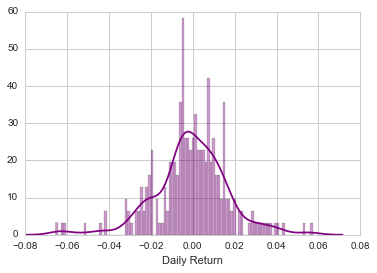

In [43]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

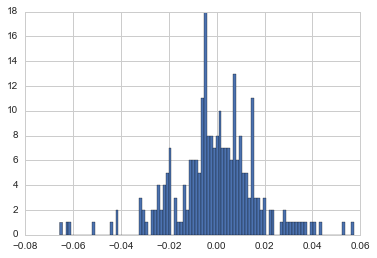

In [44]:
AAPL['Daily Return'].hist(bins=100)

In [45]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [46]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-12,124.618308,429.920013,532.330017,44.726868
2015-06-15,124.373324,423.670013,527.200012,44.250117
2015-06-16,125.039680,427.260010,528.150024,44.590655
2015-06-17,124.745705,427.809998,529.260010,44.726868
2015-06-18,125.314061,439.390015,536.729980,45.456586


In [47]:
tech_rets = closing_df.pct_change()

In [48]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-12,NaN,NaN,NaN,NaN
2015-06-15,-0.001966,-0.014538,-0.009637,-0.010659
2015-06-16,0.005358,0.008474,0.001802,0.007696
2015-06-17,-0.002351,0.001287,0.002102,0.003055
2015-06-18,0.004556,0.027068,0.014114,0.016315


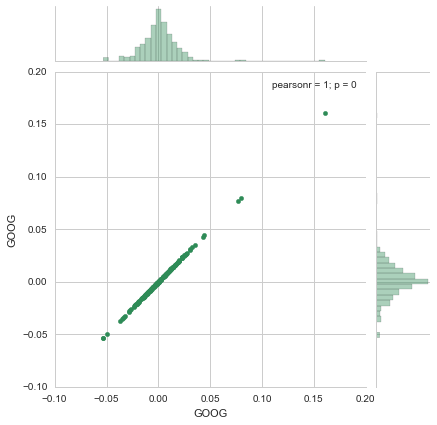

In [49]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

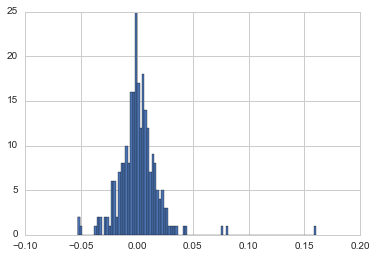

In [54]:
tech_rets['GOOG'].hist(bins=100)

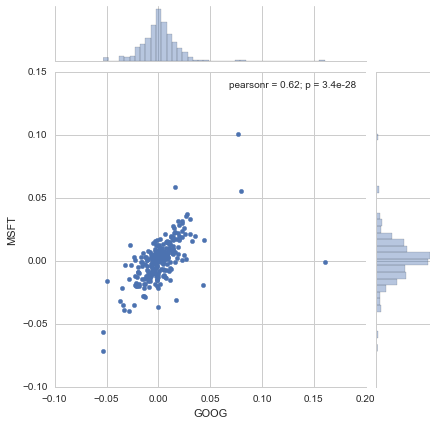

In [55]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

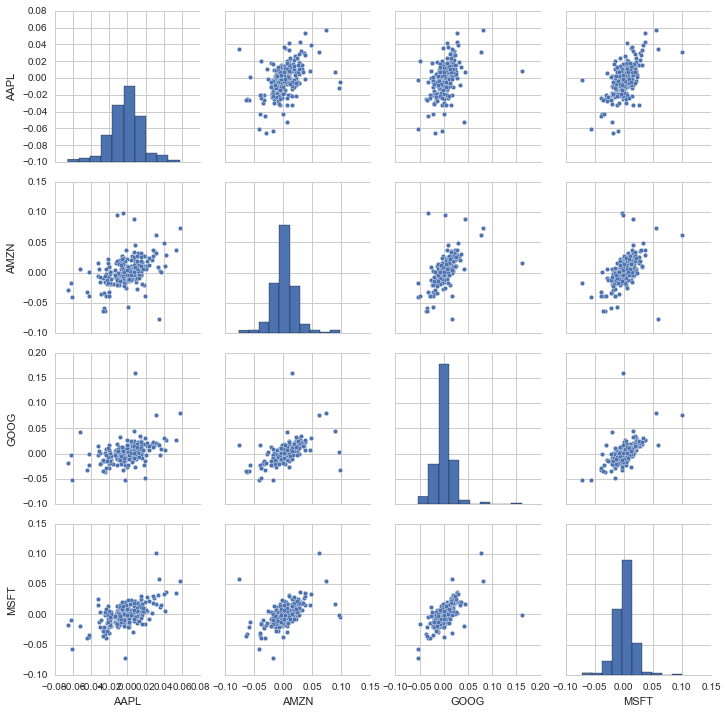

In [56]:
sns.pairplot(tech_rets.dropna())

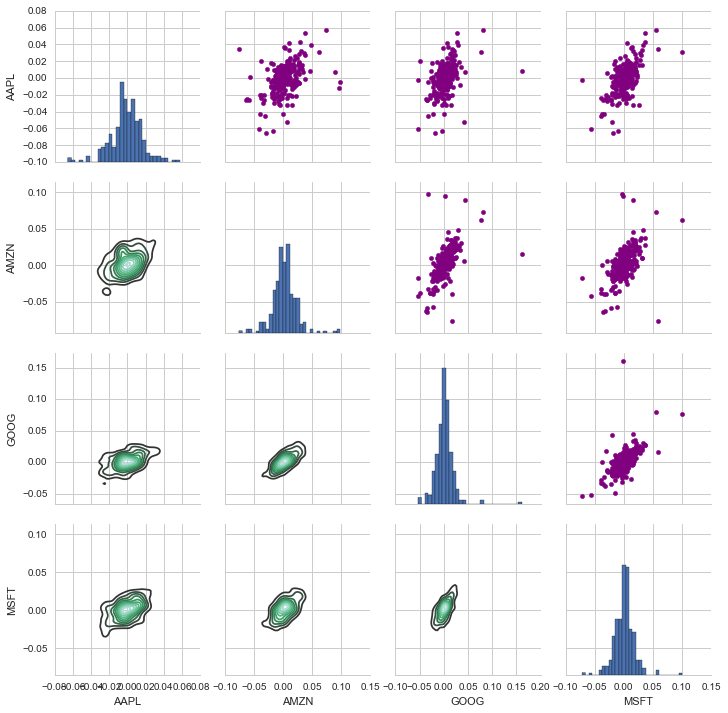

In [57]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmp='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

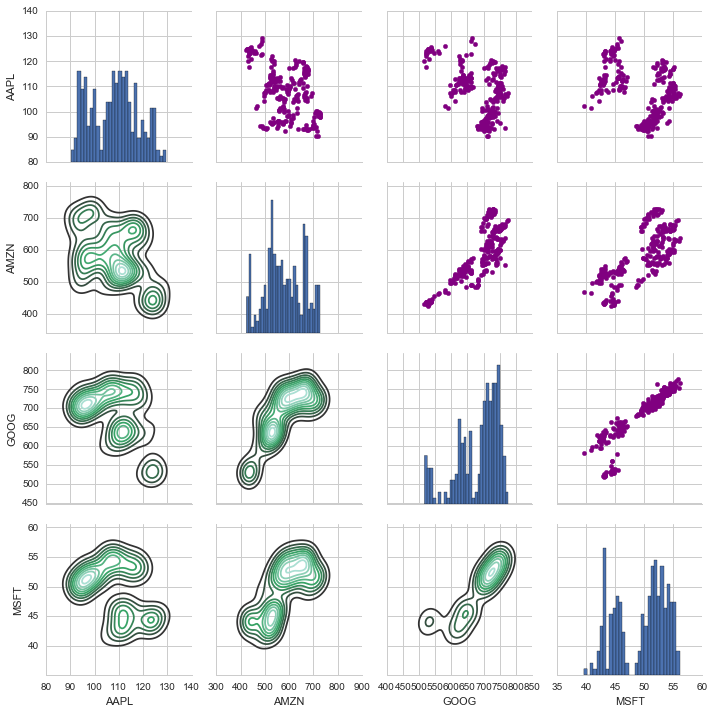

In [58]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmp='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

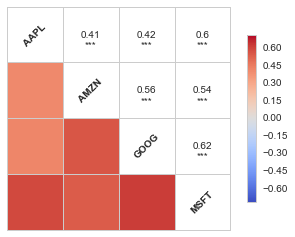

In [61]:
sns.corrplot(tech_rets.dropna(),annot=True)

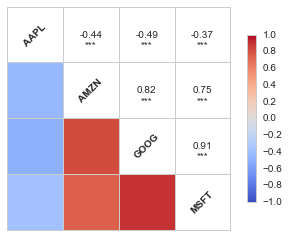

In [62]:
sns.corrplot(closing_df,annot=True)

In [63]:
# Risk analysis

rets = tech_rets.dropna()

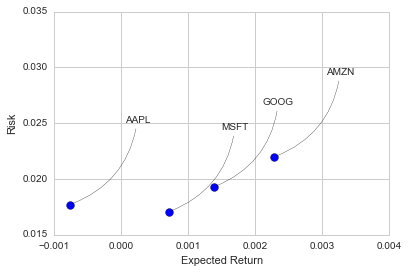

In [99]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

plt.xlim([-0.001,0.004])
plt.ylim([0.015,0.035])

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(80,80),
                textcoords='offset points', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

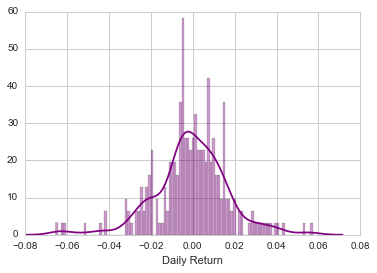

In [100]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [101]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-15,-0.001966,-0.014538,-0.009637,-0.010659
2015-06-16,0.005358,0.008474,0.001802,0.007696
2015-06-17,-0.002351,0.001287,0.002102,0.003055
2015-06-18,0.004556,0.027068,0.014114,0.016315
2015-06-19,-0.010009,-0.010173,-0.000074,-0.013271


In [102]:
rets.AAPL.quantile(0.05)

-0.028138853472663872

In [103]:
rets.GOOG.quantile(0.05)

-0.023460259360609748

In [104]:
rets.MSFT.quantile(0.05)

-0.021745796937529149

In [105]:
rets.AMZN.quantile(0.05)

-0.032817780064531343

In [124]:
days = 365
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [125]:
print(mu, sigma)

(0.0013803634424726496, 0.019285099057272149)


In [142]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    dt = 1/days
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in xrange(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + price[x-1]*(drift[x]+shock[x])
        
    return price

In [143]:
GOOG.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-06-12,531.599976,533.119995,530.159973,532.330017,955800,532.330017


In [144]:
start_price = GOOG.ix[0,0]
start_price

531.59997599999997

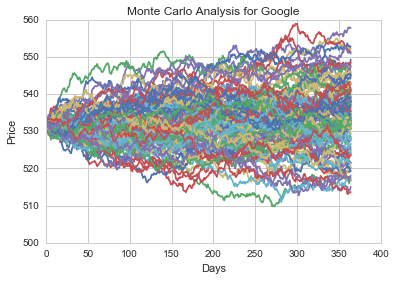

In [145]:
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [147]:
runs = 10000
simulations = np.zeros(runs)
for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

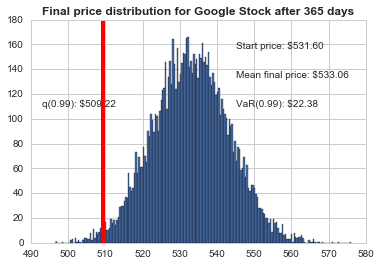

In [148]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" %(start_price-q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" %q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distribution for Google Stock after %s days" %days, weight='bold')

In [149]:
GOOG.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-06-06,724.909973,724.909973,714.609985,716.549988,1565300,716.549988
2016-06-07,719.840027,721.979980,716.549988,716.650024,1336200,716.650024
2016-06-08,723.960022,728.570007,720.580017,728.280029,1582100,728.280029
2016-06-09,722.869995,729.539978,722.335999,728.580017,985900,728.580017
2016-06-10,719.469971,725.890015,716.429993,719.409973,1206000,719.409973
